In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

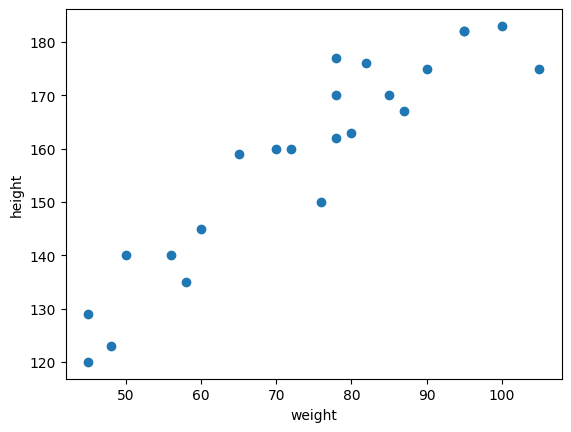

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('weight')
plt.ylabel('height')

In [6]:
from sklearn.model_selection import train_test_split

In [17]:
X=df[['Weight']]#independent
y=df[['Height']]#dependent

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [19]:
X.shape

(23, 1)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18,), (5,), (18,), (5,))

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [22]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

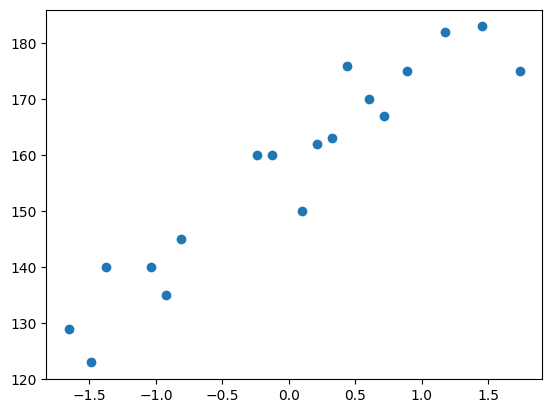

In [23]:
plt.scatter(X_train,y_train)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regressor=LinearRegression()

In [28]:
regressor.fit(X_train,y_train)

LinearRegression()

In [30]:
regressor.coef_
regressor.intercept_

array([157.5])

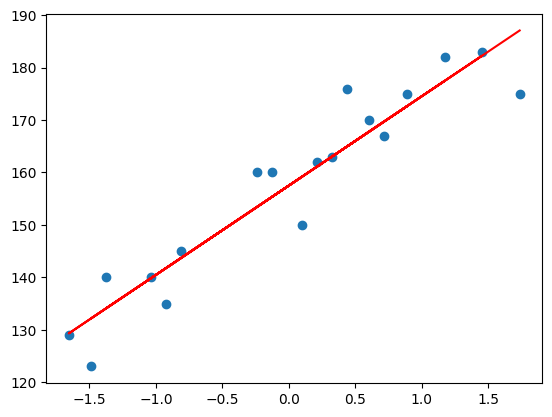

In [33]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [35]:
y_pred_test=regressor.predict(X_test)

In [36]:
y_pred_test,y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

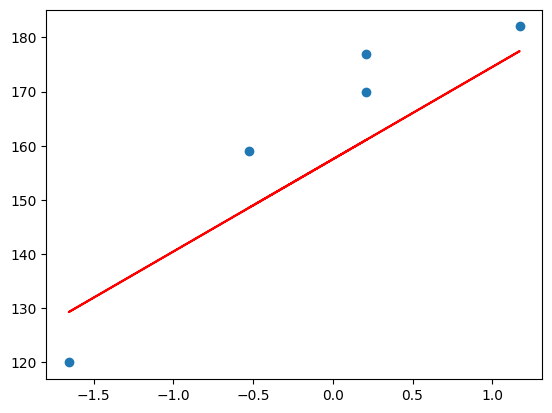

In [37]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test,'r')

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [39]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [40]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [41]:
score

0.776986986042344

In [42]:
1- (1-score) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [43]:
regressor

LinearRegression()

In [45]:
scaled_weight=scaler.transform([[80]])
scaled_weight

/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [46]:
regressor.predict(scaled_weight[[0]])

array([[163.01076266]])

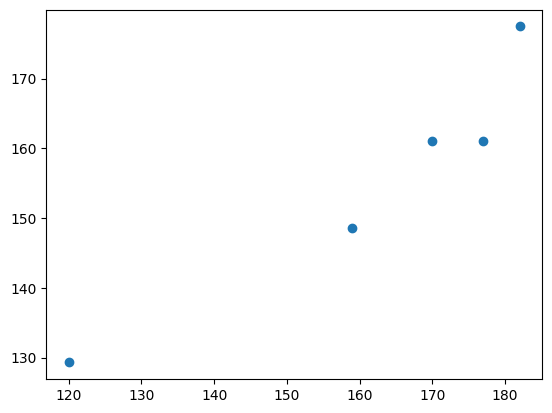

In [47]:
plt.scatter(y_test,y_pred_test)

In [49]:
residuals=y_test-y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


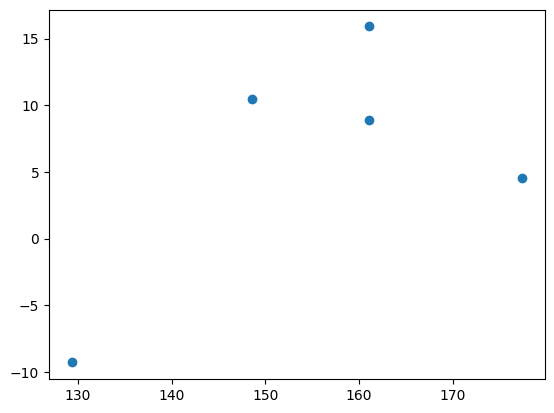

In [50]:
plt.scatter(y_pred_test,residuals)

/var/folders/3r/7dx_kd5s6956swz5bsph2vy40000gn/T/ipykernel_59571/3905197135.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: ylabel='Density'>

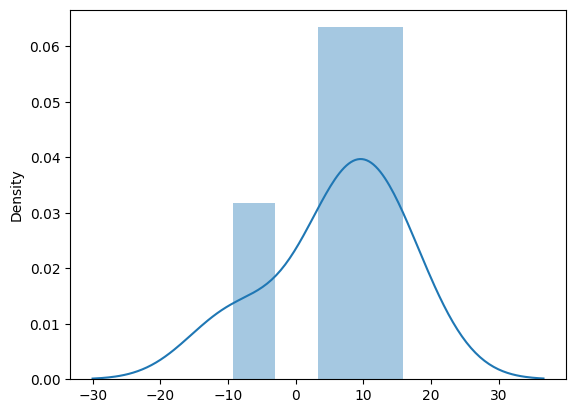

In [51]:
import seaborn as sns
sns.distplot(residuals,kde=True)